# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [137]:
import pandas as pd
import numpy as np

In [138]:
df = pd.read_csv('zillow_data.csv')

In [145]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


# Step 2: Data Preprocessing

In [146]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [147]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#melted.groupby('time').aggregate({'value':'mean'})

In [148]:
df_austin = df[df['City']=='Austin']

In [149]:
df_austin = df_austin.drop(['RegionID'], axis=1)

In [150]:
df_austin.head(2)

,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
66,78704,Austin,TX,Austin,Travis,67,221300.0,221100.0,221000.0,221000.0,...,530100,532400,534200,536200,538200,539800,540200,542300,547100,550900
98,78745,Austin,TX,Austin,Travis,99,135000.0,134200.0,133800.0,133800.0,...,286300,286900,287500,288700,289800,290500,291300,292600,294000,294700


In [151]:
df_austin = df_austin.drop(['SizeRank'], axis=1)

In [152]:
df_austinlong = melt_data(df_austin)

In [153]:
df_austinlong.sort_values(by='RegionName')

,RegionName,City,State,Metro,CountyName,time,value
9934,55912,Austin,MN,Austin,Mower,2016-12-01,87800.0
1254,55912,Austin,MN,Austin,Mower,1998-11-01,66400.0
4294,55912,Austin,MN,Austin,Mower,2005-03-01,93300.0
2414,55912,Austin,MN,Austin,Mower,2001-04-01,79900.0
334,55912,Austin,MN,Austin,Mower,1996-12-01,60700.0
...,...,...,...,...,...,...,...
8525,78759,Austin,TX,Austin,Travis,2014-01-01,335200.0
10205,78759,Austin,TX,Austin,Travis,2017-07-01,429700.0
3765,78759,Austin,TX,Austin,Travis,2004-02-01,260600.0
5725,78759,Austin,TX,Austin,Travis,2008-03-01,318100.0


In [154]:
df_austinlong['State'].value_counts()

TX    10070
AR      265
MN      265
Name: State, dtype: int64

In [155]:
df_austinlong=df_austinlong[df_austinlong['State']=='TX']

In [156]:
df_austinlong.State.value_counts()

TX    10070
Name: State, dtype: int64

In [170]:
df_austinlong.sort_values(by='RegionName', inplace=True)

In [173]:
df_78722=df_austinlong.loc[df_austinlong['RegionName']==78722]

In [174]:
df_78722['time'] = pd.to_datetime(df_78722['time'])

<ipython-input-174-36ec8844c612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_78722['time'] = pd.to_datetime(df_78722['time'])


In [175]:
df_78722.set_index('time', inplace=True)

In [176]:
df_78722.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'value'], dtype='object')

In [162]:
df_78722.drop(columns=['RegionName', 'City', 'State', 'Metro', 'CountyName'], axis=1, inplace=True)

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='time'>

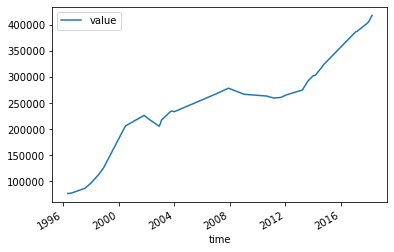

In [165]:
df_78722['2012-01-01':].plot()

In [166]:
df_78722['pct_change']=df_78722.pct_change(periods=1)

<ipython-input-166-48af73146ca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_78722['pct_change']=df_78722.pct_change(periods=1)


In [89]:
df_78722

,value,pct_change
time,,
2012-05-01,269200.0,NaN
1999-09-01,160800.0,-0.402675
2015-03-01,347700.0,1.162313
2016-09-01,378300.0,0.088007
1999-04-01,139000.0,-0.632567
...,...,...
2002-12-01,205300.0,-0.299078
2009-01-01,266800.0,0.299562
2013-04-01,274800.0,0.029985


In [93]:
df_yearly = df_78722.resample(rule='A').mean()

In [95]:
df_yearly.drop('pct_change', axis=1, inplace=True)

In [97]:
df_yearly.head(5)

,value
time,
1996-12-31,77155.555556
1997-12-31,85216.666667
1998-12-31,109750.000000
1999-12-31,150491.666667
2000-12-31,202775.000000


In [100]:
df_yearly.freq = 'Y'

In [102]:
df_yearly['test'] = df_yearly.pct_change(periods=1)

In [103]:
df_yearly.head(5)

,value,test
time,,
1996-12-31,77155.555556,NaN
1997-12-31,85216.666667,0.104479
1998-12-31,109750.000000,0.287894
1999-12-31,150491.666667,0.371222
2000-12-31,202775.000000,0.347417


In [110]:
df_yearly['test']=df_yearly['test'].map(lambda x: x*100)

In [111]:
df_yearly

,value,test
time,,
1996-12-31,77155.555556,NaN
1997-12-31,85216.666667,10.447869
1998-12-31,109750.000000,28.789360
1999-12-31,150491.666667,37.122248
2000-12-31,202775.000000,34.741680
2001-12-31,226250.000000,11.576871
2002-12-31,213608.333333,-5.587477
2003-12-31,227133.333333,6.331682
2004-12-31,226708.333333,-0.187115


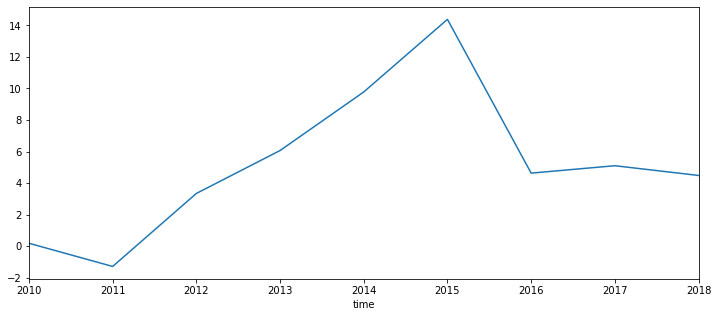

In [136]:
ax =df_yearly['test']['2010-01-01':].plot(figsize=(12,5))
from matplotlib import dates

# ax.xaxis.set_minor_locator(dates.MonthLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.xaxis.set_minor_locator(dates.MonthLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.xaxis.set_minor_formatter(dates.DateFormatter(fmt="%Q"))

In [181]:
df_austinlong.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'time', 'value'], dtype='object')

In [187]:
df_austinlong['RegionName'].value_counts(1)

78753    0.026316
78724    0.026316
78741    0.026316
78733    0.026316
78725    0.026316
78717    0.026316
78756    0.026316
78748    0.026316
78732    0.026316
78759    0.026316
78745    0.026316
78751    0.026316
78735    0.026316
78727    0.026316
78703    0.026316
78758    0.026316
78750    0.026316
78726    0.026316
78749    0.026316
78757    0.026316
78722    0.026316
78730    0.026316
78737    0.026316
78721    0.026316
78705    0.026316
78617    0.026316
78752    0.026316
78744    0.026316
78736    0.026316
78728    0.026316
78704    0.026316
78747    0.026316
78739    0.026316
78731    0.026316
78723    0.026316
78754    0.026316
78746    0.026316
78702    0.026316
Name: RegionName, dtype: float64

In [241]:
regions = list(df_austinlong['RegionName'].values)

In [242]:
df_austinlong.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'value'], dtype='object')

In [246]:
df_austinlong

,RegionName,City,State,Metro,CountyName,value
time,,,,,,
2011-07-01,78617,Austin,TX,Austin,Travis,115400.0
2004-03-01,78617,Austin,TX,Austin,Travis,117900.0
1998-06-01,78617,Austin,TX,Austin,Travis,103500.0
2013-11-01,78617,Austin,TX,Austin,Travis,123800.0
2010-01-01,78617,Austin,TX,Austin,Travis,125200.0
...,...,...,...,...,...,...
2008-06-01,78759,Austin,TX,Austin,Travis,315000.0
1998-01-01,78759,Austin,TX,Austin,Travis,264000.0
2012-05-01,78759,Austin,TX,Austin,Travis,301900.0


In [255]:
df_austinlong.index = pd.to_datetime(df_austinlong.index)

In [256]:
df_austinlong.sort_index()

,RegionName,City,State,Metro,CountyName,value
time,,,,,,
1996-04-01,78704,Austin,TX,Austin,Travis,221300.0
1996-04-01,78617,Austin,TX,Austin,Travis,121900.0
1996-04-01,78724,Austin,TX,Austin,Travis,97500.0
1996-04-01,78722,Austin,TX,Austin,Travis,76200.0
1996-04-01,78733,Austin,TX,Austin,Travis,397000.0
...,...,...,...,...,...,...
2018-04-01,78721,Austin,TX,Austin,Travis,296100.0
2018-04-01,78731,Austin,TX,Austin,Travis,610500.0
2018-04-01,78741,Austin,TX,Austin,Travis,250400.0


In [257]:
some_dict = {}
for i in regions:
    some_dict[i] = df_austinlong[df_austinlong['RegionName']==i]

In [258]:
some_dict.keys()

dict_keys([78617, 78702, 78703, 78704, 78705, 78717, 78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78730, 78731, 78732, 78733, 78735, 78736, 78737, 78739, 78741, 78744, 78745, 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759])

In [259]:
for k, v in some_dict.items():
    some_dict[k].drop(columns=['RegionName', 'City', 'State', 'Metro', 'CountyName'], axis=1,inplace=True)
    some_dict[k].sort_index(inplace=True)

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-259-debcbc35e39e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  some_dict[k].sort_index(inplace=True)


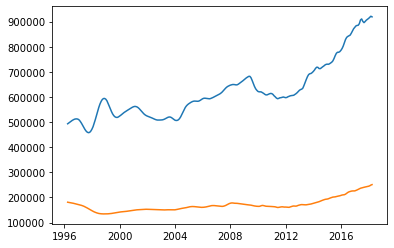

In [273]:

plt.plot(some_dict[78746])
plt.plot(some_dict[78747])

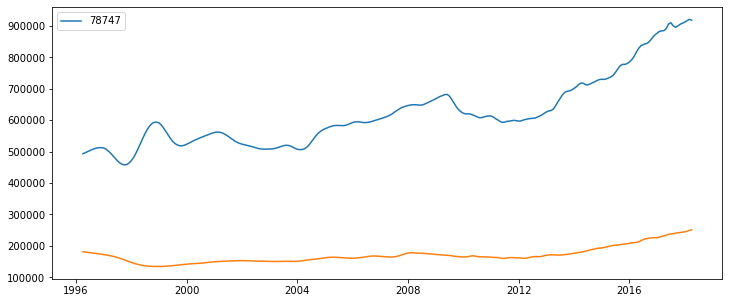

In [283]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(some_dict[78746], label='78747')
ax.plot(some_dict[78747])
ax.legend()

In [207]:
some_dict[78702].drop('RegionName', axis=1, inplace=True)

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [210]:
some_dict[78703].columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'time', 'value'], dtype='object')

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results